In [1]:
!pip install opencv-python opencv-python-headless matplotlib


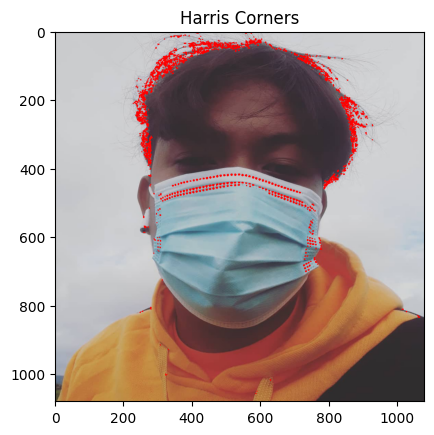

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('kuto.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to float32 (required for Harris Corner Detection)
gray = np.float32(gray)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate the corner points (optional, to mark them better)
dst = cv2.dilate(dst, None)

# Threshold for an optimal value to mark the corners
image[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.show()


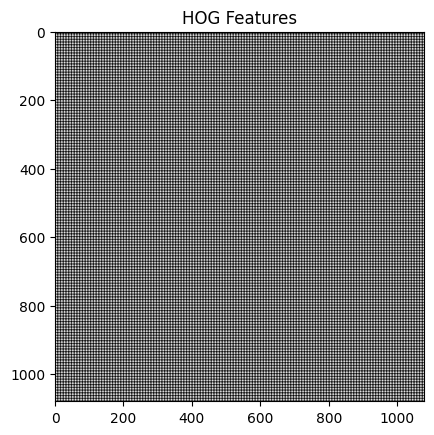

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('kuto.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create HOG descriptor
winSize = (gray.shape[1] // 8 * 8, gray.shape[0] // 8 * 8)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 9

# Initialize HOGDescriptor by passing parameters to the constructor
# Instead of setting them individually after creation
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)

# Compute HOG features and visualization
hog_features = hog.compute(gray)

# Visualize the gradients
def draw_hog(img, hog_features, cell_size=(8, 8), block_size=(2, 2), bin_n=9):
    h, w = img.shape
    # Reshape to the number of cells
    n_cells = (h // cell_size[1], w // cell_size[0])
    # The following line was modified to correctly calculate the shape
    hog_feats = hog_features.reshape(n_cells[1] - block_size[1] + 1,
                                     n_cells[0] - block_size[0] + 1,
                                     block_size[0], block_size[1], bin_n).transpose((1, 0, 2, 3, 4))
    # Create image to draw HOG visualizations
    radius = min(cell_size) // 2 - 1
    img_hog = np.zeros_like(img, dtype=np.float32)
    for x in range(n_cells[1]):
        for y in range(n_cells[0]):
            for o in range(bin_n):
                center = (x * cell_size[0] + cell_size[0] // 2,
                          y * cell_size[1] + cell_size[1] // 2)
                angle = o * np.pi / bin_n
                dx = radius * np.cos(angle)
                dy = radius * np.sin(angle)
                cv2.line(img_hog, (int(center[0] - dx), int(center[1] - dy)),
                         (int(center[0] + dx), int(center[1] + dy)), 255, 1)
    return img_hog

# Draw the HOG features
hog_img = draw_hog(gray, hog_features, cell_size=cell_size, block_size=block_size, bin_n=bin_n)

# Display the HOG features
plt.imshow(hog_img, cmap='gray')
plt.title('HOG Features')
plt.show()